In [116]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
#sns.set(rc={'figure.figsize':(20,10)})
from sklearn.preprocessing import LabelEncoder 
import warnings
warnings.filterwarnings('ignore')

In [117]:
df = pd.read_csv('HR-Employee-Attrition.csv')


In [118]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [119]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [121]:
# Drop irrelevant fields or fields with similar purpose to existing fields

df = df.drop(['EmployeeCount','HourlyRate','JobRole','MonthlyIncome','MonthlyRate','Over18','StandardHours'], axis=1)

In [122]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [123]:
encode = LabelEncoder()
df['BusinessTravel'] = encode.fit_transform(df['BusinessTravel'])
le_name_mapping = dict(zip(encode.classes_, encode.transform(encode.classes_)))
print(le_name_mapping)

{'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}


In [124]:
df['Department'] = encode.fit_transform(df['Department'])
le_name_mapping = dict(zip(encode.classes_, encode.transform(encode.classes_)))
print(le_name_mapping)

{'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}


In [125]:
df['EducationField'] = encode.fit_transform(df['EducationField'])
le_name_mapping = dict(zip(encode.classes_, encode.transform(encode.classes_)))
print(le_name_mapping)

{'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}


In [126]:
df['Attrition'] = encode.fit_transform(df['Attrition'])
le_name_mapping = dict(zip(encode.classes_, encode.transform(encode.classes_)))
print(le_name_mapping)

{'No': 0, 'Yes': 1}


In [127]:
df['Gender'] = encode.fit_transform(df['Gender'])
le_name_mapping = dict(zip(encode.classes_, encode.transform(encode.classes_)))
print(le_name_mapping)

{'Female': 0, 'Male': 1}


In [128]:
df['MaritalStatus'] = encode.fit_transform(df['MaritalStatus'])
le_name_mapping = dict(zip(encode.classes_, encode.transform(encode.classes_)))
print(le_name_mapping)
                 

{'Divorced': 0, 'Married': 1, 'Single': 2}


In [129]:
df['OverTime'] = encode.fit_transform(df['OverTime'])
le_name_mapping = dict(zip(encode.classes_, encode.transform(encode.classes_)))
print(le_name_mapping)

{'No': 0, 'Yes': 1}


In [130]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


In [131]:
# Codes of Labels

#### BusinessTravel
# {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}

### Department
# {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}

### EducationField
# {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}

### Gender
# {'Female': 0, 'Male': 1}

### MaritalStatus
# {'Divorced': 0, 'Married': 1, 'Single': 2}

### Overtime
# {'No': 0, 'Yes': 1}

### Attrition
# {'No': 0, 'Yes': 1}




In [132]:
features = ['Age','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobSatisfaction','MaritalStatus','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
#features = ['Age','BusinessTravel','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole']
X = df[features]

In [133]:
target = ['Attrition']
y = df[target]

In [134]:
from sklearn.model_selection import train_test_split # split dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [135]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestClassifier 

classifier = RandomForestClassifier(n_estimators = 100, random_state = 0) 

# fit the regressor with x and y data 
forest = classifier.fit(X, y) 

y_pred = forest.predict(X_test)


In [136]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print("accuracy: ",accuracy_score(y_test, y_pred))
print("confusion matrix: ",confusion_matrix(y_test, y_pred))
print("precision: ",precision_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))



accuracy:  1.0
confusion matrix:  [[416   0]
 [  0  70]]
precision:  1.0
recall:  1.0


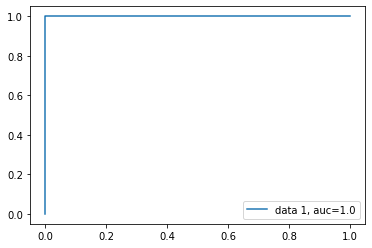

In [137]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_proba = forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

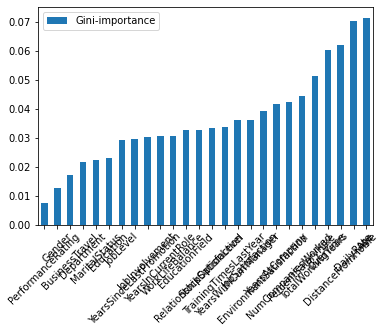

In [138]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

In [139]:
print(importances.sort_values(ascending=False,by='Gini-importance'))

                          Gini-importance
Age                              0.071471
DailyRate                        0.070284
DistanceFromHome                 0.062049
OverTime                         0.060352
TotalWorkingYears                0.051413
PercentSalaryHike                0.044322
NumCompaniesWorked               0.042230
YearsAtCompany                   0.041487
EnvironmentSatisfaction          0.039275
JobSatisfaction                  0.036261
YearsWithCurrManager             0.036236
TrainingTimesLastYear            0.033657
StockOptionLevel                 0.033187
RelationshipSatisfaction         0.032817
EducationField                   0.032699
WorkLifeBalance                  0.030702
YearsInCurrentRole               0.030699
JobInvolvement                   0.030394
YearsSinceLastPromotion          0.029552
JobLevel                         0.029325
Education                        0.023156
MaritalStatus                    0.022342
Department                       0